In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 727kB 32.8MB/s 
     |████████████████████████████████| 204kB 42.7MB/s 
     |████████████████████████████████| 1.2MB 35.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
Mounted at /content/gdrive


In [ ]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.087351,0.024259,0.007442,01:04


epoch,train_loss,valid_loss,error_rate,time
0,0.049651,0.010647,0.006089,01:22


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f'Is this a cat?: {is_cat}')
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False
Probability it's a cat: 0.001868


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/'images'),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,3.001669,2.632307,00:04


epoch,train_loss,valid_loss,time
0,2.052317,1.797953,00:04
1,1.742453,1.343218,00:04
2,1.522459,1.143105,00:04
3,1.364648,1.010440,00:04
4,1.228109,0.886701,00:04
5,1.104338,0.819713,00:04
6,1.004643,0.780895,00:04
7,0.927456,0.772737,00:04


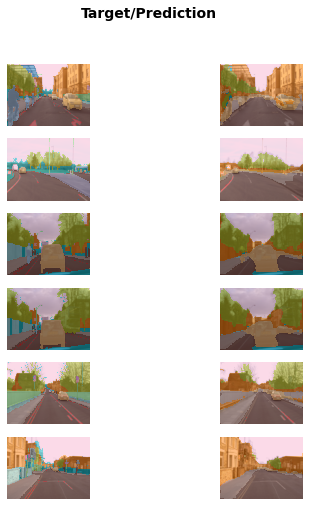

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.453607,0.398511,0.822200,07:42


epoch,train_loss,valid_loss,accuracy,time
0,0.301809,0.366338,0.849160,14:59
1,0.244732,0.242405,0.898280,14:59
2,0.187329,0.187883,0.930320,15:04


RuntimeError: ignored

If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:


In [ ]:
from fastai.text.all import *
 
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

If you keep hitting the same error, change 32 to 16.

In [ ]:
learn.predict('I really liked that movie!')

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult_csv', path=path, y_names='salary',
      cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
      cont_names ['age', 'fnlwgt', 'education-num'],
      procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()